# Playground Series - Season 3, Episode 9

### Proje [linki](https://www.kaggle.com/competitions/playground-series-s3e9/overview)

In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e9/sample_submission.csv
/kaggle/input/playground-series-s3e9/train.csv
/kaggle/input/playground-series-s3e9/test.csv


In [94]:
pd.read_csv("/kaggle/input/playground-series-s3e9/sample_submission.csv")

,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452
...,...,...
3600,9007,35.452
3601,9008,35.452
3602,9009,35.452
3603,9010,35.452


In [95]:
df1 = pd.read_csv("/kaggle/input/playground-series-s3e9/train.csv")
df2 = pd.read_csv("/kaggle/input/playground-series-s3e9/test.csv")

In [96]:
df1

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [97]:
df2

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


In [98]:
df = pd.concat([df1,df2])

In [99]:
df

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28,NaN
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,NaN
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28,NaN
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,NaN


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df
data = df.drop(["id","Strength"], axis = 1)
aziz = data.columns
data = scaler.fit_transform(data)
data

array([[ 2.14301002, -0.69734765, -0.58692116, ...,  1.73627133,
        -2.04091898, -0.70676203],
       [-1.4869288 ,  1.35269035,  2.01511854, ..., -0.3154038 ,
        -1.65735149, -0.33643696],
       [-0.09956998,  0.93661755, -0.58692116, ...,  1.08700705,
         0.28989281, -0.33643696],
       ...,
       [-0.09956998,  0.91599586, -0.58692116, ..., -0.87377108,
        -0.16143827, -0.33643696],
       [ 1.61087239,  0.7243355 , -0.58692116, ..., -1.80741312,
         0.86780116, -0.70676203],
       [ 0.31378693,  1.03123468, -0.58692116, ..., -0.76988879,
        -2.28384506, -0.64751002]])

In [101]:
aziz

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
      dtype='object')

In [102]:
data2 = pd.DataFrame(data=data, columns = aziz)

In [103]:
data2

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,2.143010,-0.697348,-0.586921,0.066445,-0.721961,1.736271,-2.040919,-0.706762
1,-1.486929,1.352690,2.015119,0.339670,0.672204,-0.315404,-1.657351,-0.336437
2,-0.099570,0.936618,-0.586921,0.050052,-0.721961,1.087007,0.289893,-0.336437
3,0.042967,0.224563,-0.586921,2.361532,-0.721961,-0.769889,-1.312141,4.655545
4,-1.353894,2.165427,-0.586921,0.394315,-0.721961,-0.725739,0.109616,0.581969
...,...,...,...,...,...,...,...,...
9007,-1.515436,0.867474,1.232687,0.831474,0.497933,-1.652888,-0.250937,-0.336437
9008,-0.175590,-0.697348,-0.586921,0.066445,-0.721961,1.463580,0.017560,-0.336437
9009,-0.099570,0.915996,-0.586921,0.503605,0.497933,-0.873771,-0.161438,-0.336437
9010,1.610872,0.724336,-0.586921,-2.567440,4.889555,-1.807413,0.867801,-0.706762


In [104]:
df[aziz] = data2

In [105]:
df

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,2.143010,-0.697348,-0.586921,0.066445,-0.721961,1.736271,-2.040919,-0.706762,10.38
1,1,-1.486929,1.352690,2.015119,0.339670,0.672204,-0.315404,-1.657351,-0.336437,23.52
2,2,-0.099570,0.936618,-0.586921,0.050052,-0.721961,1.087007,0.289893,-0.336437,36.96
3,3,0.042967,0.224563,-0.586921,2.361532,-0.721961,-0.769889,-1.312141,4.655545,39.05
4,4,-1.353894,2.165427,-0.586921,0.394315,-0.721961,-0.725739,0.109616,0.581969,74.19
...,...,...,...,...,...,...,...,...,...,...
3600,9007,-1.481227,-0.697348,2.595574,-1.441755,2.397484,-0.630946,0.918943,-0.336437,NaN
3601,9008,0.926695,-0.697348,-0.586921,0.011800,-0.721961,0.632522,-0.493863,0.581969,NaN
3602,9009,-0.125227,1.739650,-0.586921,-2.190390,1.229870,0.172843,0.397292,0.596782,NaN
3603,9010,0.480080,-0.697348,-0.586921,0.995409,-0.721961,-0.224507,0.030345,-0.543819,NaN


CementComponent


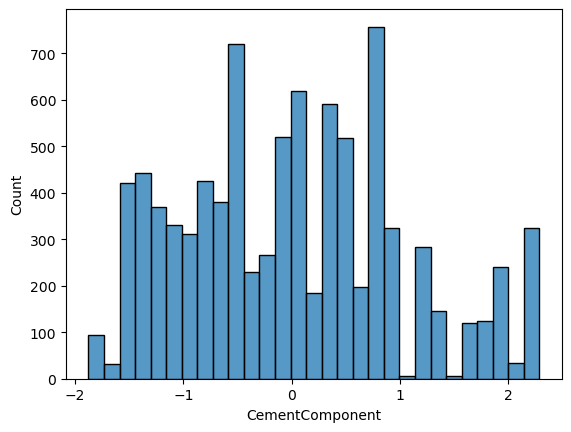

 0.470577    358
 0.299533    247
 1.905449    230
-0.603200    169
 0.099982    169
            ... 
-1.199004      1
-0.316226      1
-1.395705      1
-1.251268      1
-1.081174      1
Name: CementComponent, Length: 314, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
BlastFurnaceSlag


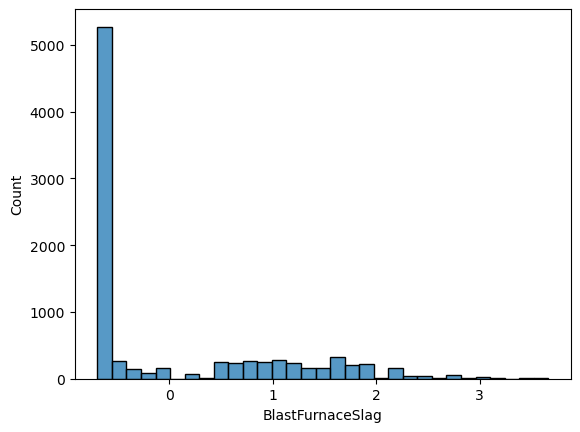

-0.697348    5262
 1.595298     170
 0.592114     147
 1.842759     125
-0.454740     124
             ... 
 0.664897       1
 1.544351       1
 0.704927       1
 0.491432       1
 0.442910       1
Name: BlastFurnaceSlag, Length: 224, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
FlyAshComponent


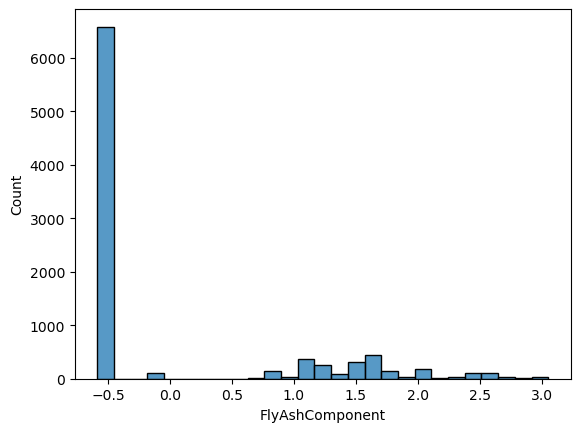

-0.586921    6585
 1.565675     146
 1.123511     130
-0.141117     100
 0.850569      99
             ... 
 1.005236       1
 2.413613       1
 1.394632       1
 2.302617       1
 1.505628       1
Name: FlyAshComponent, Length: 177, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
WaterComponent


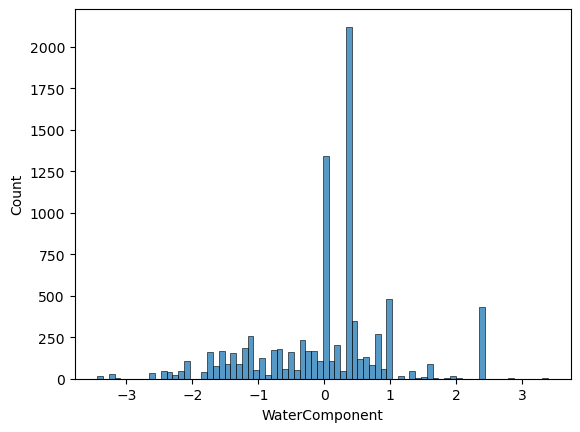

 0.394315    1999
 0.050052     652
 2.361532     435
 0.066445     399
 1.022732     290
             ... 
 2.897053       1
 2.798692       1
 0.580108       1
 0.388850       1
-0.354321       1
Name: WaterComponent, Length: 215, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
SuperplasticizerComponent


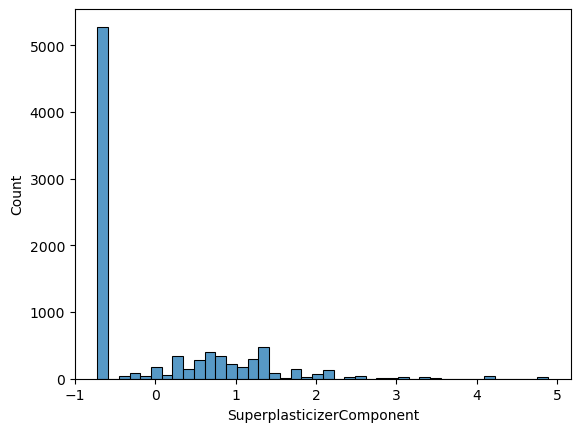

-0.721961    5278
 1.299579     277
 0.672204     172
 0.497933     161
 2.153505     122
             ... 
-0.443128       2
 0.358517       1
 0.741912       1
 1.289122       1
 1.857245       1
Name: SuperplasticizerComponent, Length: 112, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
CoarseAggregateComponent


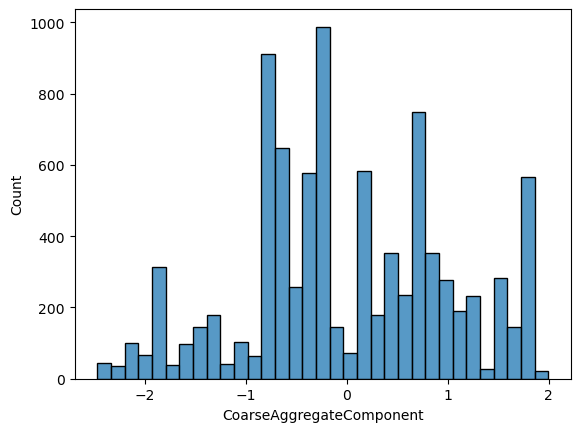

 1.736271    508
 0.723419    502
-0.769889    465
-0.302419    397
-1.807413    283
            ... 
-1.407466      1
-1.728203      1
-1.315271      1
-1.689247      1
-2.465767      1
Name: CoarseAggregateComponent, Length: 342, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
FineAggregateComponent


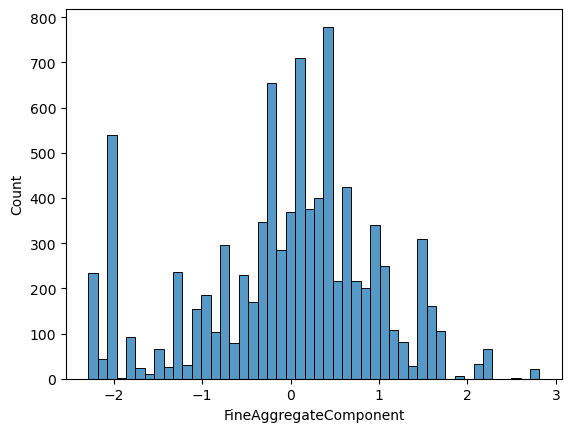

-2.040919    459
 0.426699    242
-2.283845    235
-1.312141    188
 0.925336    167
            ... 
 1.535209      1
-1.479632      1
-0.087282      1
 0.139023      1
-1.402918      1
Name: FineAggregateComponent, Length: 376, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
AgeInDays


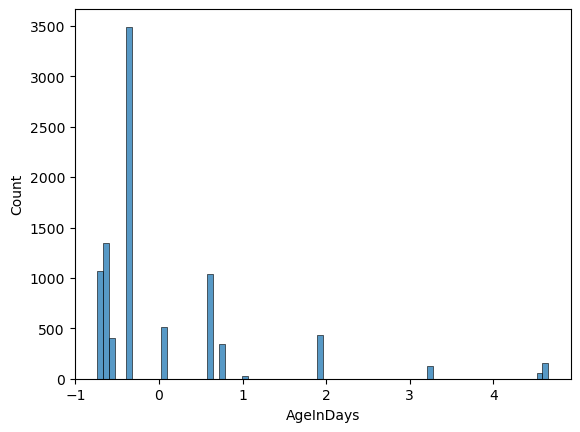

-0.336437    3492
-0.647510    1346
-0.706762    1060
 0.581969     913
 0.078327     518
 1.915139     438
-0.543819     403
 0.730099     348
 4.655545     156
 3.248310     123
 0.596782     122
 4.581480      56
 1.026359      26
-0.736388       9
-0.025364       2
Name: AgeInDays, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(1,len(df.columns)-1):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    sns.histplot(df[df.columns[i]])
    plt.show()
    print(aziz)
    print("-"*85)
    print("-"*85)

In [107]:
df["BlastFurnaceSlag"][df["BlastFurnaceSlag"]==0] = df["BlastFurnaceSlag"][df["BlastFurnaceSlag"]!=0].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df["BlastFurnaceSlag"].value_counts()

-0.697348    5262
 1.595298     170
 0.592114     147
 1.842759     125
-0.454740     124
             ... 
 0.664897       1
 1.544351       1
 0.704927       1
 0.491432       1
 0.442910       1
Name: BlastFurnaceSlag, Length: 224, dtype: int64

In [109]:
df1.shape, df2.shape

((5407, 10), (3605, 9))

In [110]:
df1.tail()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61
5406,5406,190.7,0.0,125.2,166.6,7.9,1079.0,770.1,56,63.14


In [111]:
df[5047:]

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
5047,5047,-1.816664,1.272630,-0.586921,1.022732,-0.721961,-0.689380,0.976479,0.581969,46.39
5048,5048,0.470577,-0.697348,-0.586921,0.394315,-0.721961,0.723419,0.426699,4.655545,43.58
5049,5049,-0.995652,-0.697348,1.241785,-0.796945,0.585069,0.089737,1.651557,-0.543819,17.54
5050,5050,-0.105271,0.770431,-0.586921,-0.403501,0.497933,-1.081536,0.727160,-0.336437,17.20
5051,5051,-1.515436,1.655950,-0.586921,0.011800,0.149392,-0.250477,-1.682923,0.078327,15.52
...,...,...,...,...,...,...,...,...,...,...
3600,9007,-1.481227,-0.697348,2.595574,-1.441755,2.397484,-0.630946,0.918943,-0.336437,NaN
3601,9008,0.926695,-0.697348,-0.586921,0.011800,-0.721961,0.632522,-0.493863,0.581969,NaN
3602,9009,-0.125227,1.739650,-0.586921,-2.190390,1.229870,0.172843,0.397292,0.596782,NaN
3603,9010,0.480080,-0.697348,-0.586921,0.995409,-0.721961,-0.224507,0.030345,-0.543819,NaN


In [112]:
df.columns

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [113]:
x = df1.drop(["id", "Strength"], axis=1)
y = df1["Strength"]

### Makine Öğrenmesi Modeli

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [115]:
def regression_test(x,y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state=42)
    
    aziz_models = [L, E, R, Lass, ETR, GBR, XGBC]
    aziz_names = ["Linear Reg.", "ElasticNet Reg.", "Ridge Reg.", "Lasso Reg.",
                 "Extra Tree Reg.", "Gadient Boosting Reg.", "xGradient Boosting Reg."]
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ["R_Squared", "RMSE", "MAE"], index = aziz_names)
    
    for aziz in aziz_models:
        aziz.fit(x_train, y_train)
        az = aziz.predict(x_test)
        
        r_squared.append(r2_score(y_test, az))
        rmse.append(mean_squared_error(y_test, az)**.5)
        mae.append(mean_absolute_error(y_test, az))
    
    
    
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values("R_Squared", ascending = False)

In [116]:
regression_test(x,y)

,R_Squared,RMSE,MAE
Gadient Boosting Reg.,0.489885,11.781847,9.237232
xGradient Boosting Reg.,0.411387,12.655941,9.842098
Ridge Reg.,0.238296,14.397013,11.463268
Linear Reg.,0.238296,14.397013,11.463267
ElasticNet Reg.,0.238230,14.397640,11.470677
Lasso Reg.,0.238038,14.399457,11.475556
Extra Tree Reg.,0.188249,14.862462,11.329340


### Derin Öğrenme Modeli

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [119]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1)) # regresyonda burayı 1 seçiyoruz activation yazmıyoruz
model.compile(loss="mse",optimizer='adam')

In [120]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500, batch_size=256, verbose=1)

Epoch 1/1500
17/17 [==============================] - 2s 15ms/step - loss: 944.9597 - val_loss: 255.8319
Epoch 2/1500
17/17 [==============================] - 0s 6ms/step - loss: 237.1313 - val_loss: 229.7364
Epoch 3/1500
17/17 [==============================] - 0s 5ms/step - loss: 227.7557 - val_loss: 226.3573
Epoch 4/1500
17/17 [==============================] - 0s 5ms/step - loss: 220.2433 - val_loss: 209.3708
Epoch 5/1500
17/17 [==============================] - 0s 6ms/step - loss: 210.6716 - val_loss: 202.5509
Epoch 6/1500
17/17 [==============================] - 0s 5ms/step - loss: 209.4737 - val_loss: 195.4546
Epoch 7/1500
17/17 [==============================] - 0s 6ms/step - loss: 193.4016 - val_loss: 186.3111
Epoch 8/1500
17/17 [==============================] - 0s 6ms/step - loss: 191.7909 - val_loss: 181.1223
Epoch 9/1500
17/17 [==============================] - 0s 5ms/step - loss: 196.1884 - val_loss: 176.3934
Epoch 10/1500
17/17 [==============================] - 0s 5ms/s

In [121]:
model.evaluate(x_test,y_test)

34/34 [==============================] - 0s 1ms/step - loss: 162.3190


162.3190460205078

In [122]:
tahmin = model.predict(x_test)

34/34 [==============================] - 0s 1ms/step


In [123]:
from sklearn.metrics import r2_score

In [124]:
r2_score(tahmin,y_test)

0.044535778097990586

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
(mean_squared_error(y_test,tahmin))**.5

12.740449376754341

<AxesSubplot:>

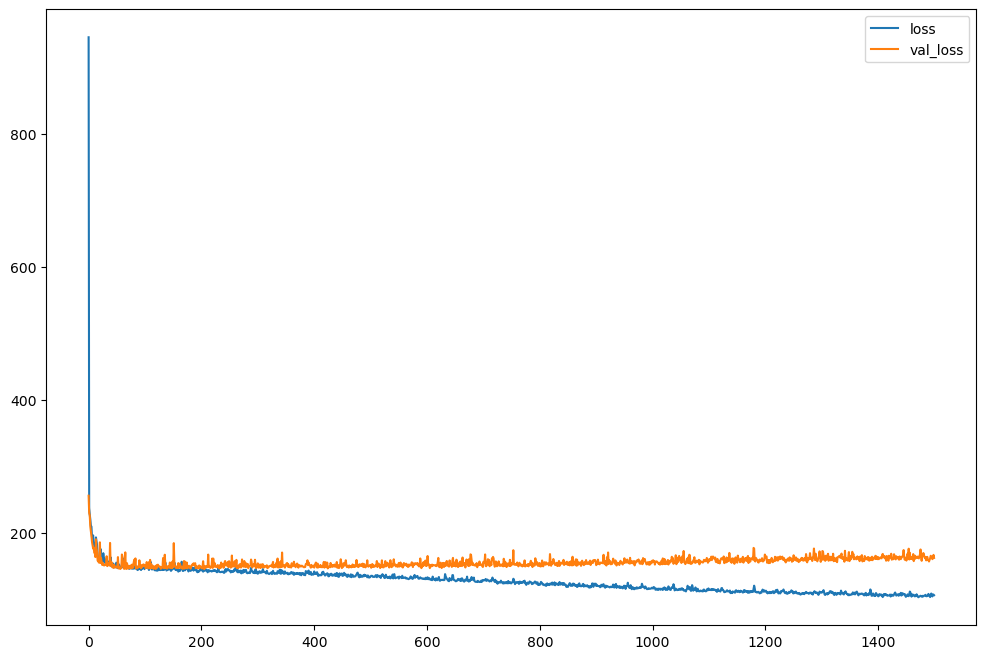

In [127]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [128]:
tahmin

array([[16.180473],
       [21.419252],
       [39.90414 ],
       ...,
       [17.076027],
       [36.272366],
       [17.610744]], dtype=float32)

In [129]:
tahmin2 = model.predict(df2.drop("id", axis=1))

113/113 [==============================] - 0s 1ms/step


In [130]:
df2

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


In [131]:
len(df2), len(tahmin2)

(3605, 3605)

In [132]:
np.array(tahmin2).shape

(3605, 1)

In [133]:
df5 = pd.DataFrame()

In [134]:
df5["id"] = df2["id"]

In [135]:
df5["Strength"] = tahmin2

In [136]:
df5.to_csv("pred.csv", index=False)